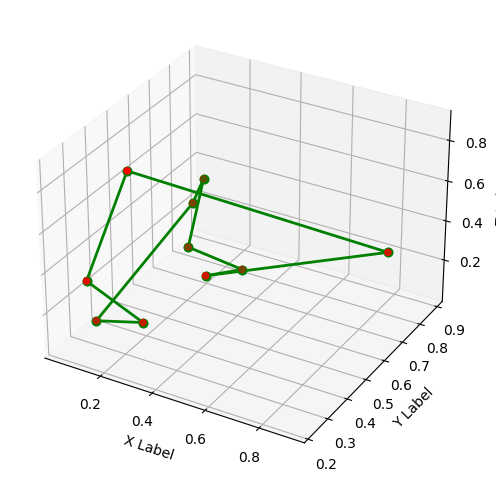

In [3]:
#IMPLEMENTATION
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf
    
    for iteration in range(n_iterations):
        paths = []
        path_lengths = []
        
        for ant in range(n_ants):
            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0
            
            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))
                
                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / distance(points[current_point], 
                                                                                            points[unvisited_point])**beta
                
                probabilities /= np.sum(probabilities)
                
                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point
            
            paths.append(path)
            path_lengths.append(path_length)
            
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length
        
        pheromone *= evaporation_rate
        
        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):
                pheromone[path[i], path[i+1]] += Q/path_length
            pheromone[path[-1], path[0]] += Q/path_length
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')
    
    for i in range(n_points-1):
        ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                [points[best_path[i],2], points[best_path[i+1],2]],
                c='g', linestyle='-', linewidth=2, marker='o')
        
    ax.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            [points[best_path[0],2], points[best_path[-1],2]],
            c='g', linestyle='-', linewidth=2, marker='o')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
# Example usage:
points = np.random.rand(10, 3) # Generate 10 random 3D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)